# load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
table = np.load('/home/yunzheng/mock/color/data/newcatalogue/snap_92_new_with_zform.npy')

In [3]:
subid = table[:,0]
vpeak = table[:,1]
zform = table[:,11]

## 按照速度由小到大重新排列

In [4]:
stag = np.argsort(vpeak)
subid = subid[stag]
vpeak = vpeak[stag]
zform = zform[stag]

In [171]:
len(vpeak)

26241654

In [14]:
subid[24853104]

4148.0

In [9]:
vpeak[-1]

1835.6221923828125

In [8]:
print(np.max(zform))
print(np.min(zform))

12.406872085246118
0.2182580231028184


In [13]:
np.where(zform ==12.406872085246118)

(array([24853104]),)

# 分bin统计

In [10]:
######对整体
bin_0 = np.arange(30,1841,10)
inds = np.digitize(vpeak,bin_0)

In [11]:
print(len(bin_0))

182


In [12]:
bin_0[70]

730

## 分bin存id，vpeak，zform

In [179]:
# 尝试把subhalo信息都存成一行方便查找
vpeak_bin = [[]for _ in range(182)]
for n in range(len(vpeak)):
    sub_info = np.array((int(subid[n]),vpeak[n],zform[n]))
    vpeak_bin[inds[n]].append(sub_info)

In [180]:
a = np.array(vpeak_bin[20])
a[:,1]

array([220.0002594 , 220.00030518, 220.00032043, ..., 229.99919128,
       229.99923706, 229.99951172])

In [259]:
len(vpeak_bin[70])

311

In [260]:
temp = (vpeak>800)*(vpeak<=840)

In [269]:
vpeak[temp]

array([800.02410889, 800.04736328, 800.0602417 , 800.11102295,
       800.12255859, 800.16906738, 800.2612915 , 800.27661133,
       800.36535645, 800.38378906, 800.4598999 , 800.47894287,
       800.52941895, 800.53625488, 800.59332275, 800.61730957,
       800.80541992, 800.89318848, 801.15496826, 801.18585205,
       801.19158936, 801.20428467, 801.29333496, 801.38171387,
       801.39794922, 801.54937744, 801.61364746, 801.61883545,
       801.6963501 , 801.73474121, 801.83331299, 801.85723877,
       801.86480713, 801.92749023, 801.95794678, 801.97851562,
       802.08105469, 802.12469482, 802.14923096, 802.15710449,
       802.23583984, 802.25665283, 802.34173584, 802.34490967,
       802.42895508, 802.50134277, 802.57330322, 802.62609863,
       802.76898193, 802.81176758, 802.83184814, 802.8604126 ,
       802.88476562, 802.99200439, 803.09338379, 803.1217041 ,
       803.12988281, 803.16394043, 803.1741333 , 803.2197876 ,
       803.34100342, 803.41473389, 803.47839355, 803.54

# 对红移分bin计算 zform cdf

## 对红移分bin

In [23]:
print(max(zform))

12.406872085246118


In [287]:
arr_red = np.arange(21)
bin_red = -0.32 + 12.8 * arr_red / 20

In [415]:
arr_red = np.arange(52)
bin_red = -0.125 + 12.75 * arr_red / 51

In [257]:
bin_red[20]

12.5

In [373]:
0.25*50

12.5

In [416]:
bin_red

array([-0.125,  0.125,  0.375,  0.625,  0.875,  1.125,  1.375,  1.625,
        1.875,  2.125,  2.375,  2.625,  2.875,  3.125,  3.375,  3.625,
        3.875,  4.125,  4.375,  4.625,  4.875,  5.125,  5.375,  5.625,
        5.875,  6.125,  6.375,  6.625,  6.875,  7.125,  7.375,  7.625,
        7.875,  8.125,  8.375,  8.625,  8.875,  9.125,  9.375,  9.625,
        9.875, 10.125, 10.375, 10.625, 10.875, 11.125, 11.375, 11.625,
       11.875, 12.125, 12.375, 12.625])

## 用np.histgram计算cdf

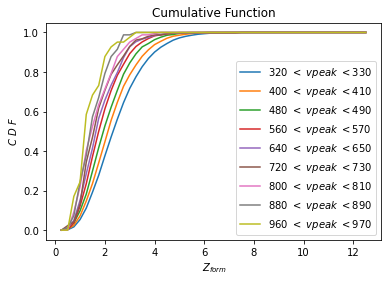

In [266]:
for i in range(30,100,8):

    info = np.array(vpeak_bin[i])
    v_hist = np.histogram(info[:,2],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    plt.plot(bin_red[1:],cdf,label = '$%s\ <\ vpeak\ < %s$'%(bin_0[i-1],bin_0[i]))
plt.legend()
plt.title('Cumulative Function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$C\ D \ F$')
plt.savefig('/home/yunzheng/mock/color/picture/cumulative_function_test.pdf',dpi = 100)

# 分bin统计(log space)

In [15]:
######对整体
bin_log = np.logspace(1.478,3.264,num = 40)

### 测试上下限

In [347]:
np.log10(1840)

3.2648178230095364

In [38]:
10**3.264

1836.5383433483455

In [349]:
np.log10(30)

1.4771212547196624

In [44]:
10**1.497

31.40508693876218

In [520]:
bin_log[14]

131.56131481070796

In [312]:
bin_log[0]

30.060763026282306

## 分bin存vpeak、zform

In [6]:
inds_log = np.digitize(vpeak,bin_log)

In [7]:
vpeak_logbin = [[]for _ in range(40)]
for n in range(len(vpeak)):
    sub_info = np.array((int(subid[n]),vpeak[n],zform[n]))
    vpeak_logbin[inds_log[n]].append(sub_info)

In [431]:
max(inds_log)

39

In [403]:
bin_log[33:]

array([ 975.50785153, 1083.99091165, 1204.53802059, 1338.49078202,
       1487.33999504, 1652.74224563, 1836.53834335])

In [434]:
np.array(vpeak_logbin[39]).shape

(3, 3)

### 用内部函数分bin尝试如下

In [362]:
vpeak_logbin_test = [[]for _ in range(36)]

for n in range(len(bin_log)):
#     sub_info = np.array((int(subid[n]),vpeak[n],zform[n]))
    temp= (vpeak>=bin_log[n])*(vpeak<bin_log[n+1])
    print(temp)
    a = np.stack((subid[temp],vpeak[temp],zform[temp]),axis=1)
    print(a.shape)

    vpeak_logbin_test[n].append(a)

[ True  True  True ... False False False]
(9, 3)
[False False False ... False False False]
(100, 3)
[False False False ... False False False]
(794, 3)
[False False False ... False False False]
(8315, 3)
[False False False ... False False False]
(46640, 3)
[False False False ... False False False]
(261756, 3)
[False False False ... False False False]
(975277, 3)
[False False False ... False False False]
(2458179, 3)
[False False False ... False False False]
(4262926, 3)
[False False False ... False False False]
(4770592, 3)
[False False False ... False False False]
(4106337, 3)
[False False False ... False False False]
(2957607, 3)
[False False False ... False False False]
(1963332, 3)
[False False False ... False False False]
(1327347, 3)
[False False False ... False False False]
(924729, 3)
[False False False ... False False False]
(648642, 3)
[False False False ... False False False]
(457500, 3)
[False False False ... False False False]
(322589, 3)
[False False False ... False False 

IndexError: index 40 is out of bounds for axis 0 with size 40

In [374]:
vpeak_logbin_test[0]

[array([[1.23607216e+08, 3.14089699e+01, 2.53440511e-01],
        [1.23104252e+08, 3.22051086e+01, 2.89062937e-01],
        [1.19959075e+08, 3.22896271e+01, 4.43556025e-01],
        [1.23443625e+08, 3.23239708e+01, 2.53440511e-01],
        [1.23153522e+08, 3.25514641e+01, 2.89062937e-01],
        [1.23592840e+08, 3.28375664e+01, 2.53440511e-01],
        [1.23785868e+08, 3.31623535e+01, 2.53440511e-01],
        [1.23464336e+08, 3.33657494e+01, 2.53440511e-01],
        [1.20105230e+08, 3.33743668e+01, 4.43556025e-01]])]

## red_bin 统计

32
33
34
35
36
37
38


Text(0, 0.5, '$C\\ D \\ F$')

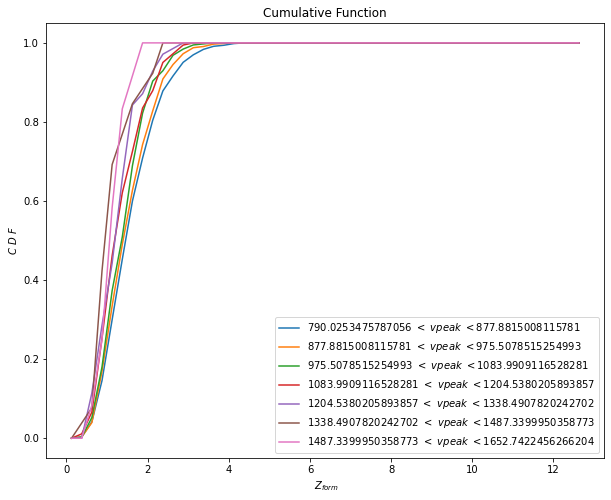

In [419]:
plt.figure(figsize=(10,8))
for i in range(32,39):
    print(i)
    info = np.array(vpeak_logbin[i])
    v_hist = np.histogram(info[:,2],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    plt.plot(bin_red[1:],cdf,label = '$%s\ <\ vpeak\ < %s$'%(bin_log[i-1],bin_log[i]))
plt.legend()
plt.title('Cumulative Function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$C\ D \ F$')
# plt.savefig('/home/yunzheng/mock/color/picture/cumulative_function_test.pdf',dpi = 100)

### 通过画图比较得出从第35个bin开始出现问题

#### 把35、36两个bin合在一起，37、38、39三个bin合在一起

In [188]:
np.mean(np.array(vpeak_logbin[-3])[:,1])

1403.7839731069712

In [216]:
a = np.array(vpeak_logbin[-1])
b = np.array(vpeak_logbin[-2])
c = np.array(vpeak_logbin[-3])


In [465]:
temp1 = np.concatenate((c,b,a),axis=0)
# temp1 = np.concatenate((c,b),axis=0)

In [449]:
# temp1

In [218]:
d = np.array(vpeak_logbin[-4])
f = np.array(vpeak_logbin[-5])
e = np.array(vpeak_logbin[-6])


In [291]:
np.max(np.array(vpeak_logbin[36])[:,2])

2.6753232584170483

In [405]:
temp2 = np.concatenate((f,d),axis=0)
# temp2 = np.concatenate((f,d,c),axis=0) 

In [337]:
temp2[:,1][1]

1084.988037109375

In [263]:
temp3 = np.concatenate((e,f),axis=0)

In [336]:
temp2.shape

(252, 3)

In [444]:
bin_log[33]

975.5078515254993

### 统计每个bin的cdf

32
33
34


Text(0, 0.5, '$C\\ D \\ F$')

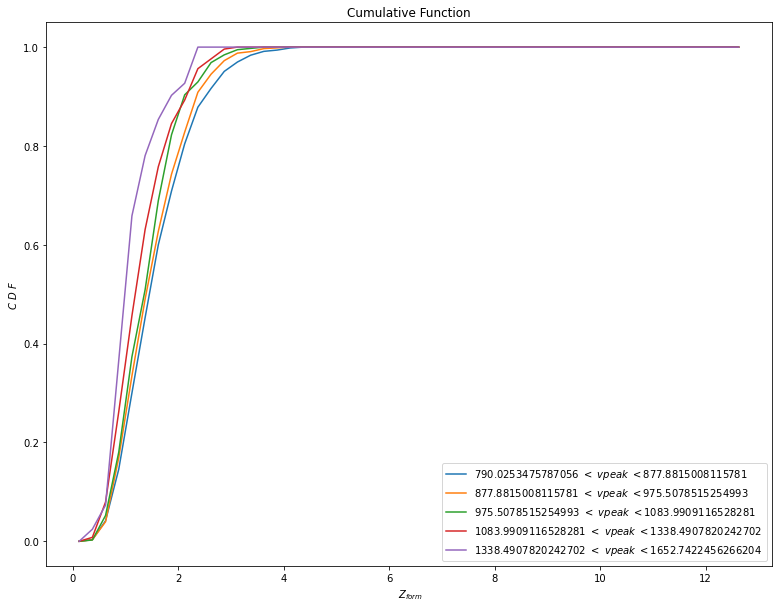

In [466]:
plt.figure(figsize=(13,10))
for i in range(32,35):
    print(i)
    info = np.array(vpeak_logbin[i])
    v_hist = np.histogram(info[:,2],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    plt.plot(bin_red[1:],cdf,label = '$%s\ <\ vpeak\ < %s$'%(bin_log[i-1],bin_log[i]))

v_hist1 = np.histogram(temp1[:,2],bin_red)[0]
cdf1 = np.cumsum(v_hist1/sum(v_hist1))

v_hist2 = np.histogram(temp2[:,2],bin_red)[0]
cdf2 = np.cumsum(v_hist2/sum(v_hist2))
# v_hist3 = np.histogram(temp3[:,2],bin_red)[0]
# cdf3 = np.cumsum(v_hist3/sum(v_hist3))
# plt.plot(bin_red[1:],cdf3,label = '$%s\ <\ vpeak\ < %s$'%(bin_log[33],bin_log[35]))
plt.plot(bin_red[1:],cdf2,label = '$%s\ <\ vpeak\ < %s$'%(bin_log[-6],bin_log[-4]))
plt.plot(bin_red[1:],cdf1,label = '$%s\ <\ vpeak\ < %s$'%(bin_log[-4],bin_log[-2]))




plt.plot()
plt.legend()
plt.title('Cumulative Function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$C\ D \ F$')

In [103]:
cdf1[6:9]

array([0.84684685, 0.9       , 0.95      ])

#### 先统计满足规律的15-35 log bin

In [500]:
len(vpeak_logbin[36])

70

In [469]:
z_cdf = [[]for _ in range(51)]

for i in range(1,34):

    info = np.array(vpeak_logbin[i])
#     print(info)
    vpeak_mean = np.mean(info[:,1])
    v_hist = np.histogram(info[:,2],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    
    for j in range(51):
        z_red = 0.5 * (bin_red[j]+bin_red[j+1])
        z_info = np.array((vpeak_mean,cdf[j],z_red))
        z_cdf[j].append(z_info)
            
            

In [425]:
bin_red[52]

IndexError: index 52 is out of bounds for axis 0 with size 52

In [340]:
z_cdf[0]

[array([32.61324183,  0.77777778,  0.        ]),
 array([35.77154488,  0.59      ,  0.        ]),
 array([39.7224999 ,  0.29345088,  0.        ]),
 array([44.23440853,  0.1117258 ,  0.        ]),
 array([4.90245373e+01, 1.57590051e-02, 0.00000000e+00]),
 array([5.44180160e+01, 3.48416082e-03, 0.00000000e+00]),
 array([6.03003569e+01, 7.66961591e-04, 0.00000000e+00]),
 array([6.67155767e+01, 2.40015068e-04, 0.00000000e+00]),
 array([7.39073123e+01, 9.28939419e-05, 0.00000000e+00]),
 array([8.19054956e+01, 4.73735754e-05, 0.00000000e+00]),
 array([9.07698660e+01, 3.53112762e-05, 0.00000000e+00]),
 array([1.00754086e+02, 2.87394505e-05, 0.00000000e+00]),
 array([1.11979601e+02, 2.95416160e-05, 0.00000000e+00]),
 array([1.24457871e+02, 4.29428024e-05, 0.00000000e+00]),
 array([1.38317258e+02, 6.05582825e-05, 0.00000000e+00]),
 array([1.53704151e+02, 6.47506637e-05, 0.00000000e+00]),
 array([1.70797466e+02, 6.33879781e-05, 0.00000000e+00]),
 array([1.89787228e+02, 8.98976717e-05, 0.00000000

In [423]:
z_cdf[0]

[array([32.61324183,  0.        ,  0.        ]),
 array([35.77154488,  0.        ,  0.        ]),
 array([39.7224999,  0.       ,  0.       ]),
 array([44.23440853,  0.        ,  0.        ]),
 array([49.02453734,  0.        ,  0.        ]),
 array([54.41801602,  0.        ,  0.        ]),
 array([60.30035689,  0.        ,  0.        ]),
 array([66.71557673,  0.        ,  0.        ]),
 array([73.90731232,  0.        ,  0.        ]),
 array([81.90549555,  0.        ,  0.        ]),
 array([90.76986599,  0.        ,  0.        ]),
 array([100.75408597,   0.        ,   0.        ]),
 array([111.97960137,   0.        ,   0.        ]),
 array([124.45787111,   0.        ,   0.        ]),
 array([138.31725831,   0.        ,   0.        ]),
 array([153.70415069,   0.        ,   0.        ]),
 array([170.79746599,   0.        ,   0.        ]),
 array([189.78722813,   0.        ,   0.        ]),
 array([210.8988981,   0.       ,   0.       ]),
 array([234.31149026,   0.        ,   0.        ]),

#### 统计最后两个合并的bin

In [470]:
v_hist1 = np.histogram(temp1[:,2],bin_red)[0]
cdf1 = np.cumsum(v_hist1/sum(v_hist1))
vpeak_mean1 = np.mean(temp1[:,1])



v_hist2 = np.histogram(temp2[:,2],bin_red)[0]
cdf2 = np.cumsum(v_hist2/sum(v_hist2))
vpeak_mean2 = np.mean(temp2[:,1])

for j in range(51):
        z_red = 0.5 * (bin_red[j]+bin_red[j+1])
        z_info = np.array((vpeak_mean2,cdf2[j],z_red))
        z_cdf[j].append(z_info)
        
for j in range(51):
        z_red = 0.5 * (bin_red[j]+bin_red[j+1])
        z_info = np.array((vpeak_mean1,cdf1[j],z_red))
        z_cdf[j].append(z_info)


In [294]:
bin_red[20]

12.48

In [427]:
cdf1


array([0.        , 0.02631579, 0.07894737, 0.36842105, 0.65789474,
       0.78947368, 0.86842105, 0.92105263, 0.94736842, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

#### 想要添加第一组数据使得红移为0时所有subhalo cdf均为0

In [615]:
vpeaktemp = np.array(z_cdf[2])[:,0]

In [616]:
vpeaktemp

array([ 138.31725831,  153.70415069,  170.79746599,  189.78722813,
        210.8988981 ,  234.31149026,  260.38251905,  289.38892696,
        321.53184686,  357.14593608,  396.89947377,  441.16687723,
        490.12189185,  544.75286824,  605.02374879,  671.58179247,
        746.29048005,  829.78158606,  920.11091797, 1023.68474306,
       1170.94333758, 1467.45944288])

In [567]:
redtemp = np.zeros(22)

In [572]:
cdftemp = np.zeros(22)

In [596]:
subtemp = []
subtemp = np.stack((vpeaktemp,cdftemp,redtemp),axis=-1)

In [598]:
z_cdf[0] = subtemp

In [728]:
np.array(z_cdf[16])

array([[1.38317258e+02, 5.23679911e-01, 3.87500000e+00],
       [1.53704151e+02, 5.92712159e-01, 3.87500000e+00],
       [1.70797466e+02, 6.52271038e-01, 3.87500000e+00],
       [1.89787228e+02, 7.03343883e-01, 3.87500000e+00],
       [2.10898898e+02, 7.48529289e-01, 3.87500000e+00],
       [2.34311490e+02, 7.92666892e-01, 3.87500000e+00],
       [2.60382519e+02, 8.31334440e-01, 3.87500000e+00],
       [2.89388927e+02, 8.63849765e-01, 3.87500000e+00],
       [3.21531847e+02, 8.95716305e-01, 3.87500000e+00],
       [3.57145936e+02, 9.17635735e-01, 3.87500000e+00],
       [3.96899474e+02, 9.38922337e-01, 3.87500000e+00],
       [4.41166877e+02, 9.53948820e-01, 3.87500000e+00],
       [4.90121892e+02, 9.64208062e-01, 3.87500000e+00],
       [5.44752868e+02, 9.78140734e-01, 3.87500000e+00],
       [6.05023749e+02, 9.84911354e-01, 3.87500000e+00],
       [6.71581792e+02, 9.87507617e-01, 3.87500000e+00],
       [7.46290480e+02, 9.93984962e-01, 3.87500000e+00],
       [8.29781586e+02, 9.95689

#### 想要添加最后一组数据使得红移为12.5时所有subhalo cdf均为1

In [606]:
vpeaktemp = np.array(z_cdf[0])[:,0]

In [660]:
redtemp = np.ones(22) * 12.5

In [608]:
cdftemp = np.ones(22)

In [663]:
subtemp = []
subtemp = np.stack((vpeaktemp,cdftemp,redtemp),axis=-1)

In [664]:
z_cdf[51] = subtemp

In [429]:
len(z_cdf)

51

In [471]:
z_cdf[10]

[array([32.61324183,  1.        ,  2.5       ]),
 array([35.77154488,  1.        ,  2.5       ]),
 array([39.7224999,  1.       ,  2.5      ]),
 array([44.23440853,  1.        ,  2.5       ]),
 array([49.02453734,  1.        ,  2.5       ]),
 array([54.41801602,  0.99704305,  2.5       ]),
 array([60.30035689,  0.99036992,  2.5       ]),
 array([66.71557673,  0.92291367,  2.5       ]),
 array([73.90731232,  0.59829821,  2.5       ]),
 array([81.90549555,  0.29451816,  2.5       ]),
 array([90.76986599,  0.12408407,  2.5       ]),
 array([1.00754086e+02, 9.34055809e-02, 2.50000000e+00]),
 array([111.97960137,   0.12499363,   2.5       ]),
 array([124.45787111,   0.1702441 ,   2.5       ]),
 array([138.31725831,   0.21737071,   2.5       ]),
 array([153.70415069,   0.2607463 ,   2.5       ]),
 array([170.79746599,   0.30465137,   2.5       ]),
 array([189.78722813,   0.34963064,   2.5       ]),
 array([210.8988981 ,   0.39248298,   2.5       ]),
 array([234.31149026,   0.44066895,   2.5 

In [472]:
np.save('/home/yunzheng/mock/color/data/zcdf/cdf_new_new.npy',z_cdf)

# 对每个红移bin做vpeak插值

## 用scipy.interpolate 做外插 得到每个subhalo速度

In [473]:
z_cdf_new = np.load('/home/yunzheng/mock/color/data/zcdf/cdf_new_new.npy')

In [474]:
z_cdf_new[50]

array([[3.26132418e+01, 1.00000000e+00, 1.25000000e+01],
       [3.57715449e+01, 1.00000000e+00, 1.25000000e+01],
       [3.97224999e+01, 1.00000000e+00, 1.25000000e+01],
       [4.42344085e+01, 1.00000000e+00, 1.25000000e+01],
       [4.90245373e+01, 1.00000000e+00, 1.25000000e+01],
       [5.44180160e+01, 1.00000000e+00, 1.25000000e+01],
       [6.03003569e+01, 1.00000000e+00, 1.25000000e+01],
       [6.67155767e+01, 1.00000000e+00, 1.25000000e+01],
       [7.39073123e+01, 1.00000000e+00, 1.25000000e+01],
       [8.19054956e+01, 1.00000000e+00, 1.25000000e+01],
       [9.07698660e+01, 1.00000000e+00, 1.25000000e+01],
       [1.00754086e+02, 1.00000000e+00, 1.25000000e+01],
       [1.11979601e+02, 1.00000000e+00, 1.25000000e+01],
       [1.24457871e+02, 1.00000000e+00, 1.25000000e+01],
       [1.38317258e+02, 1.00000000e+00, 1.25000000e+01],
       [1.53704151e+02, 1.00000000e+00, 1.25000000e+01],
       [1.70797466e+02, 1.00000000e+00, 1.25000000e+01],
       [1.89787228e+02, 1.00000

In [30]:
from scipy.interpolate import interp1dTrue

In [475]:
cdf_inter = [[]for _ in range(51)]
temp_inter = [[]for _ in range(51)]
for i in range(51):
    v0 = z_cdf_new[i][:,0]
    cdf0 = z_cdf_new[i][:,1]
    red0 = z_cdf_new[i][:,2]
    f_in = interp1d(v0,cdf0, fill_value='extrapolate')
    temp_inter[i] = f_in(vpeak)
    
    temp_ex = temp_inter[i] > 1
    temp_inter[i][temp_ex] = 1
    
    temp_ex = temp_inter[i] < 0
    temp_inter[i][temp_ex] = 0
    cdf_inter[i] = temp_inter[i]

In [356]:
temp_inter[0].shape


(26241654,)

In [476]:
temparray = np.array(cdf_inter)

In [751]:
temparray[:,23139211]

array([0.00000000e+00, 2.16338665e-06, 4.11748971e-04, 2.60204704e-03,
       8.50046700e-03, 1.96692654e-02, 3.70805710e-02, 6.13089391e-02,
       9.27997171e-02, 1.31010567e-01, 1.74240679e-01, 2.23186755e-01,
       2.74550940e-01, 3.28166706e-01, 3.81785422e-01, 4.37039754e-01,
       4.93369875e-01, 5.45917094e-01, 6.00116316e-01, 6.52681966e-01,
       6.99873921e-01, 7.40985175e-01, 7.79310210e-01, 8.09832981e-01,
       8.36983633e-01, 8.69322130e-01, 8.95279132e-01, 9.18802224e-01,
       9.39430417e-01, 9.56947627e-01, 9.71531500e-01, 9.81964111e-01,
       9.88981175e-01, 9.93315785e-01, 9.95858051e-01, 9.97773893e-01,
       9.99004164e-01, 9.99548696e-01, 9.99795963e-01, 9.99899248e-01,
       9.99999132e-01, 1.00000000e+00, 9.99996238e-01, 1.00000000e+00,
       1.00000000e+00, 9.99998988e-01, 9.99999595e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [480]:
temparray[:,26241653]

array([0.        , 0.04481967, 0.06547966, 0.49491954, 0.90957813,
       0.9661552 , 0.9725097 , 0.97346131, 0.96901002, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [348]:
temparray[:,26241653]

array([0.04332933, 0.50841315, 0.6121132 , 0.48978606, 1.        ,
       1.        , 1.        , 0.99977535, 0.98972503, 0.98801228,
       0.98838956, 0.98841442, 1.        , 0.99999991, 1.        ,
       0.99999995, 1.        , 1.        , 1.        , 1.        ])

In [477]:
cdf_red = np.ones(51)
for i in range(51):
    cdf_red[i] = z_cdf_new[i][0][2] 

In [478]:
cdf_red

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 ])

In [413]:
np.save('/home/yunzheng/mock/color/data/zcdf/cdf_redbin_new.npy',cdf_red)

In [414]:
np.save('/home/yunzheng/mock/color/data/zcdf/cdf_inter_new.npy',cdf_inter)

## 画图检验

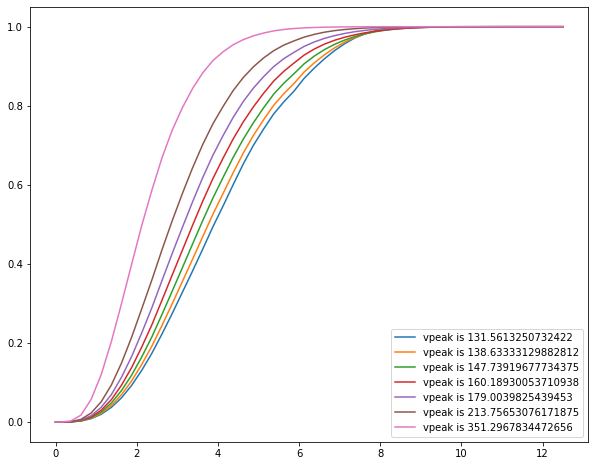

In [756]:
plt.figure(figsize=(10,8))
for i in range(23139211,26241654,500000):
    plt.plot(cdf_red,temparray[:,i],label = 'vpeak is %s'%vpeak[i])
plt.legend()

26240030
26240230
26240430
26240630
26240830
26241030
26241230
26241430
26241630


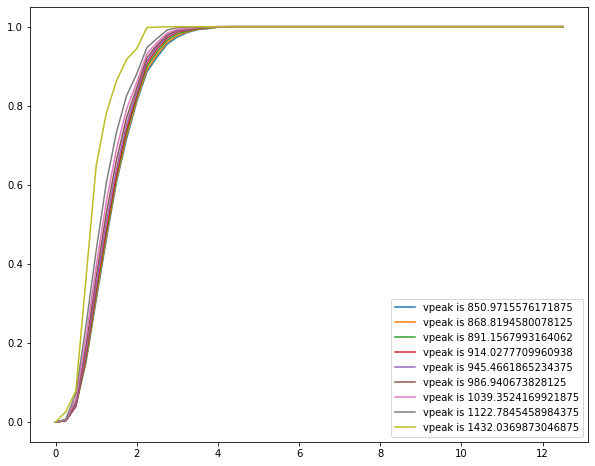

In [468]:
plt.figure(figsize=(10,8))
for i in range(26240030,26241654,200):
# for i in range(23139211,26241654,500000):
    print(i)
    plt.plot(cdf_red,temparray[:,i],label = 'vpeak is %s'%vpeak[i])
plt.legend()

In [ ]:
plt.figure(figsize=(10,8))
for i in range(26241400,26241654,20):
# for i in range(23139211,26241654,500000):
    print(i)
    plt.plot(cdf_red,temparray[:,i],label = 'vpeak is %s'%vpeak[i])
plt.legend()